##### This notebook will introduce the data analysis

##### We will analyze Bangladesh's economic data for last few years. Thank You BIZDATA INSIGHTS for providing the data

##### First thing first, we will load the data and analyze it

In [1]:
import pandas as pd
import math

In [2]:
data = pd.read_csv('BizDataINSIGHTMaster.xlsx-Economy.csv')
data.head()

,Sector,Calendar Year,Budget Year,Indicator,Source,Calendar Value,Budget Value,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Unit
0,Economy,NaN,2018-2019,Account Balance,Bangladesh Bank,NaN,-5.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Billion USD
1,Economy,NaN,2017-2018,Account Balance,Bangladesh Bank,NaN,-9.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Billion USD
2,Economy,NaN,2016-2017,Account Balance,Bangladesh Bank,NaN,-1.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Billion USD
3,Economy,NaN,2015-2016,Account Balance,Bangladesh Bank,NaN,4.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Billion USD
4,Economy,NaN,2014-2015,Account Balance,Bangladesh Bank,NaN,3.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Billion USD


In [3]:
data.describe(include='all')

,Sector,Calendar Year,Budget Year,Indicator,Source,Calendar Value,Budget Value,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Unit
count,1387,417.000000,1135,1552,1552,279,1128,103,106,107,100,97,98,119,117,120,119,100,94,1552
unique,1,NaN,21,167,17,257,991,101,104,103,95,94,94,113,111,115,113,96,86,9
top,Economy,NaN,2019-2020,Remittance,Bangladesh Bank,440,8%,5.57%,1.32,1.29,1.19,1.50,5.52%,83.75,83.75,83.75,1.01,1.18,83.90,Million USD
freq,1387,NaN,115,41,729,3,14,2,2,2,2,2,2,3,3,3,2,2,3,537
mean,NaN,2014.824940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,4.836813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector          1387 non-null   object 
 1   Calendar Year   417 non-null    float64
 2   Budget Year     1135 non-null   object 
 3   Indicator       1552 non-null   object 
 4   Source          1552 non-null   object 
 5   Calendar Value  279 non-null    object 
 6   Budget Value    1128 non-null   object 
 7   Jan             103 non-null    object 
 8   Feb             106 non-null    object 
 9   Mar             107 non-null    object 
 10  Apr             100 non-null    object 
 11  May             97 non-null     object 
 12  Jun             98 non-null     object 
 13  Jul             119 non-null    object 
 14  Aug             117 non-null    object 
 15  Sep             120 non-null    object 
 16  Oct             119 non-null    object 
 17  Nov             100 non-null    o

In [5]:
data.isnull().sum()

Sector             165
Calendar Year     1135
Budget Year        417
Indicator            0
Source               0
Calendar Value    1273
Budget Value       424
Jan               1449
Feb               1446
Mar               1445
Apr               1452
May               1455
Jun               1454
Jul               1433
Aug               1435
Sep               1432
Oct               1433
Nov               1452
Dec               1458
Unit                 0
dtype: int64

##### This database has yearly, budget yearly and monthly data. We have yearly data with indicator and source. We will seperate the data into yearly, budget yearly and monthly to get a clear picture.

In [6]:
data1 = data.copy()
data1 = data1.dropna(subset=['Calendar Year','Calendar Value'])
data1.head()

,Sector,Calendar Year,Budget Year,Indicator,Source,Calendar Value,Budget Value,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Unit
114,Economy,2011.0,NaN,Current Account Balance,World Bank,-161.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Million USD
115,Economy,2012.0,NaN,Current Account Balance,World Bank,2575.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Million USD
116,Economy,2013.0,NaN,Current Account Balance,World Bank,2058.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Million USD
117,Economy,2014.0,NaN,Current Account Balance,World Bank,755.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Million USD
118,Economy,2015.0,NaN,Current Account Balance,World Bank,2579.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Million USD


In [7]:
data1 = data1[["Calendar Year","Calendar Value", "Indicator","Unit"]]
data1.head()

,Calendar Year,Calendar Value,Indicator,Unit
114,2011.0,-161.84,Current Account Balance,Million USD
115,2012.0,2575.50,Current Account Balance,Million USD
116,2013.0,2058.47,Current Account Balance,Million USD
117,2014.0,755.79,Current Account Balance,Million USD
118,2015.0,2579.62,Current Account Balance,Million USD


### Now we can see data1 contains all the yearly data along with the indicators. Now we can analyze and view the data

In [8]:
#Total number of unique indicators
len(data1['Indicator'].unique())

39

In [9]:
#Total number of unique Units
len(data1['Unit'].unique())

6

/media/blackcat/DataDrive/Projects/DataProjects/BangladeshEconomicDataAnalysis/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


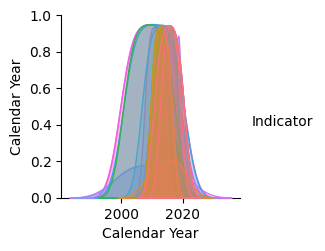

In [10]:
import seaborn as sns
### We will use matplotlib for the graphs
import matplotlib.pyplot as plt

sns.pairplot(data1, hue='Indicator')
plt.show()

### So we can see that we can easily get information about the data. And these info will help us to find and work on the correct way. Our target is to visualize the data in a meaningful way

In [11]:
# We will queary one indicator and plot it
data2 = data1.query("Indicator == 'Gross Domestic Product (GDP)' ")
data2.head()

,Calendar Year,Calendar Value,Indicator,Unit
673,2001.0,53.99,Gross Domestic Product (GDP),Billion USD
674,2002.0,54.72,Gross Domestic Product (GDP),Billion USD
675,2003.0,60.16,Gross Domestic Product (GDP),Billion USD
676,2004.0,65.11,Gross Domestic Product (GDP),Billion USD
677,2005.0,69.44,Gross Domestic Product (GDP),Billion USD


<BarContainer object of 20 artists>

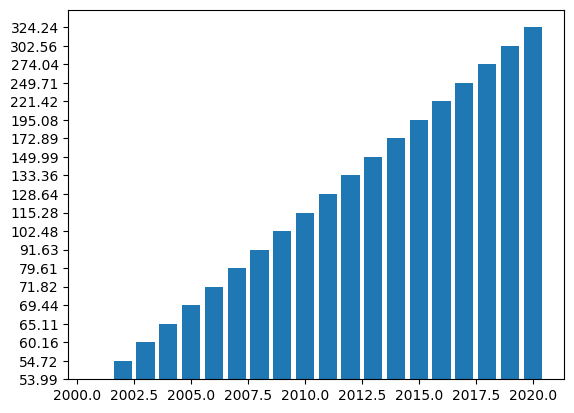

In [12]:
plt.bar(data2['Calendar Year'], data2['Calendar Value'])

In [13]:
data1['Indicator'].unique()

array(['Current Account Balance', 'Deposit at Swiss Bank by Bangladeshi',
       'Export To Kenya', 'External Debt',
       'Extreme poverty / Ultra-poverty (%)',
       'FDI - Agriculture & Fishing', 'FDI - Banking',
       'FDI - Equity Capital', 'FDI - Food', 'FDI - Intra Company Loans',
       'FDI - Power, Gas, Petroleaum', 'FDI - Reinvested earnings',
       'FDI - Telecommunications', 'FDI - Textile & Wearing',
       'FDI as % of GDP', 'FDI from Hong Kong', 'FDI from India',
       'FDI from Japan', 'FDI from Korea', 'FDI from Malaysia',
       'FDI from Netherlands', 'FDI from Singapore', 'FDI from Sri Lanka',
       'FDI from UK', 'FDI from USA', 'Government Debt (% of GDP)',
       'Gross Domestic Product (GDP)', 'Import from Canada',
       'Income Inequality in Bangladesh',
       'Loan or Credit in Private Sector', 'Net Foreign Investment - DSE',
       'Outward FDI from Bangladesh', 'Overall Poverty (%)',
       'Per capita Gross National Income (GNI)', 'Remittance',
   

#### We can change the indicator value and get different basic plot for it

### We can plot multiple indicator at once to see the difference

In [14]:
# We will queary the second indicator and plot it
data3 = data1.query("Indicator == 'Government Debt (% of GDP)' ")
data3.head()

,Calendar Year,Calendar Value,Indicator,Unit
657,2011.0,32.4%,Government Debt (% of GDP),Percentage
658,2012.0,31.8%,Government Debt (% of GDP),Percentage
659,2013.0,30.4%,Government Debt (% of GDP),Percentage
660,2014.0,29.6%,Government Debt (% of GDP),Percentage
661,2015.0,27.7%,Government Debt (% of GDP),Percentage


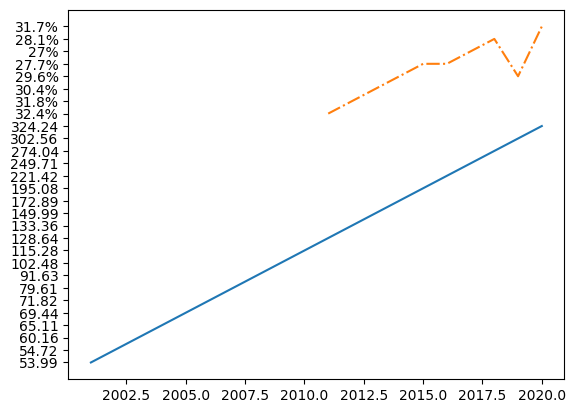

In [15]:
x = data2['Calendar Year']
y = data2['Calendar Value']
x1 = data3['Calendar Year']
y1 = data3['Calendar Value']
plt.plot(x,y)
plt.plot(x1, y1, '-.')
plt.show()

/media/blackcat/DataDrive/Projects/DataProjects/BangladeshEconomicDataAnalysis/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


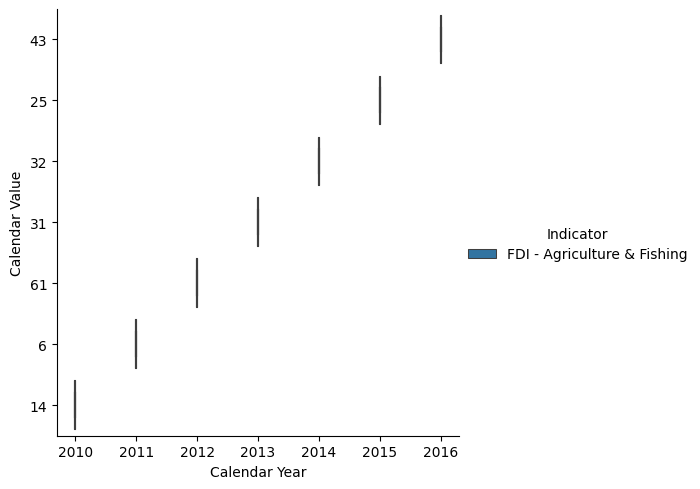

In [16]:
data4 = data1.query("Indicator == 'FDI - Agriculture & Fishing'")
sns.catplot(x='Calendar Year', y='Calendar Value', hue='Indicator', data=data4, kind='box')

### Lets visualize few of them together for better understanding

In [17]:
data5 = data1.query("Indicator in ('Per capita Gross National Income (GNI)','Remittance','Gross Domestic Product (GDP)')")

/media/blackcat/DataDrive/Projects/DataProjects/BangladeshEconomicDataAnalysis/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


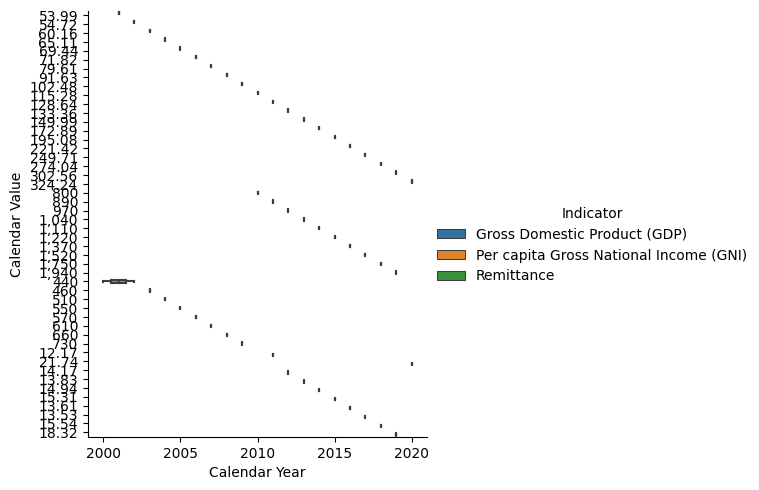

In [18]:
sns.catplot(x='Calendar Year', y='Calendar Value', hue='Indicator', data=data5, kind='box')
plt.show()

<Axes: xlabel='Calendar Year', ylabel='Calendar Value'>

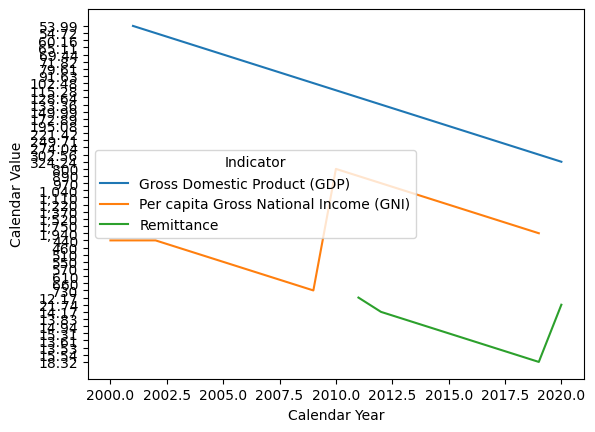

In [20]:
sns.lineplot(data=data5, x="Calendar Year", y="Calendar Value", hue='Indicator')

<Axes: xlabel='Calendar Year', ylabel='Calendar Value'>

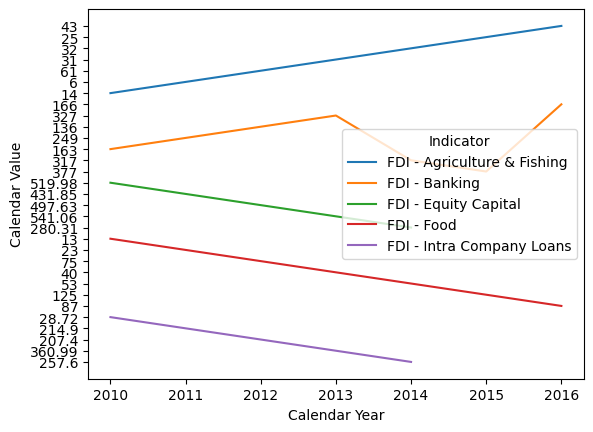

In [23]:
data6 = data1.query("Indicator in ('FDI - Agriculture & Fishing','FDI - Banking', 'FDI - Equity Capital', 'FDI - Food', 'FDI - Intra Company Loans')")
sns.lineplot(data=data6, x="Calendar Year", y="Calendar Value", hue='Indicator', legend="full")

<Axes: xlabel='Calendar Year', ylabel='Calendar Value'>

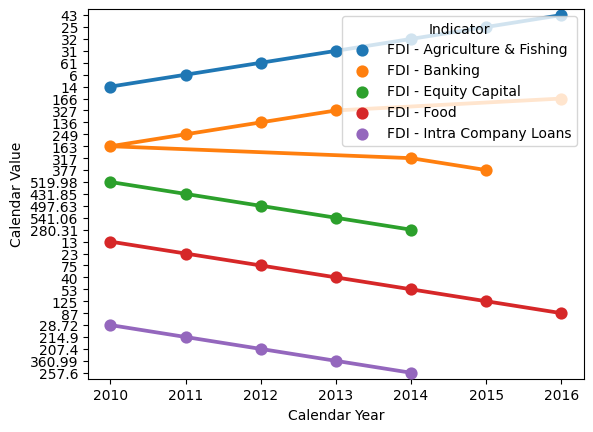

In [32]:
sns.pointplot(data=data6, x="Calendar Year", y="Calendar Value", hue="Indicator")

### We can plot different way to visualize it to understand the situation. This is how we plot data and visualize it